In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

import pandas as pd
import datetime

options = Options()
options.headless = True

driver = webdriver.Chrome(options=options, service=ChromeService(
    ChromeDriverManager().install()))


In [2]:
url = 'https://www.transfermarkt.com/weltmeisterschaft-2022/gesamtspielplan/pokalwettbewerb/WM22/saison_id/2021'


In [4]:
driver.get(url)
nt = driver.find_elements(
    By.CSS_SELECTOR, '.large-6.columns .grid-view table.items tbody tr')


In [5]:
nt_list = []
for i in range(len(nt)):
    nt_name = nt[i].find_element(
        By.CSS_SELECTOR, 'td:nth-child(3) a:nth-child(1)').get_attribute('title')
    nt_url = nt[i].find_element(
        By.CSS_SELECTOR, 'td:nth-child(3) a:nth-child(1)').get_attribute('href')
    flag_url = nt[i].find_element(
        By.CSS_SELECTOR, 'td:nth-child(2) .flaggenrahmen').get_attribute('href')
    squad_url = f"{nt_url.replace('spielplan','kader')}/plus/1"
    nt_list.append({
        'nt_name': nt_name,
        'nt_url': nt_url,
        'flag_url': flag_url,
        'squad_url': squad_url,
    })
nt_df = pd.DataFrame(nt_list)
nt_df.to_excel('../../../data/wc22_team.xlsx')


In [2]:
def get_wc22_squad(driver, url):
    driver.get(url)
    players = driver.find_elements(By.CSS_SELECTOR, '#yw1 .items > tbody > tr')
    try:
        country = driver.find_element(
            By.CSS_SELECTOR, '.data-header__headline-container').text
    except:
        country = None
    player_list = []
    print(f"Get {country} squad :")
    for i in range(len(players)):
        name = players[i].find_element(
            By.CSS_SELECTOR, 'td:nth-child(2) table img').get_attribute('title')
        src = players[i].find_element(
            By.CSS_SELECTOR, 'td:nth-child(2) table img').get_attribute('data-src')
        dob = players[i].find_element(
            By.CSS_SELECTOR, 'td:nth-child(3)').get_attribute('innerHTML')
        club = players[i].find_element(
            By.CSS_SELECTOR, 'td:nth-child(4) a').get_attribute('title')
        club_url = players[i].find_element(
            By.CSS_SELECTOR, 'td:nth-child(4) a').get_attribute('href')
        height = players[i].find_element(
            By.CSS_SELECTOR, 'td:nth-child(5)').get_attribute('innerHTML')
        caps = players[i].find_element(
            By.CSS_SELECTOR, 'td:nth-child(7)').get_attribute('innerHTML')
        market_value = players[i].find_element(
            By.CSS_SELECTOR, 'td:nth-child(10)').get_attribute('innerHTML')
        position = players[i].find_element(
            By.CSS_SELECTOR, 'td:nth-child(2) tbody tr:nth-child(2) td').get_attribute('innerHTML').strip()
        print(f"{i+1}. {name} - {position}")

        player_list.append({
            'name': name,
            'position': position,
            'dob': dob,
            'club': club,
            'club_url': club_url,            
            'caps': caps,
            'height': height,
            'market_value': market_value,
            'country': country
        })
    player_df = pd.DataFrame(player_list).reset_index(drop=True)
    return player_df


In [245]:
def get_club_detail(driver, url):
    driver.get(url)    
    try:
        league = driver.find_element(
            By.CSS_SELECTOR, '.data-header__box--big .data-header__club').text
    except:
        league = None
    try:
        league_country = driver.find_element(
            By.CSS_SELECTOR, '.data-header__box--big .flaggenrahmen').get_attribute('title')
    except:
        league_country = None
    try:
        league_tier = driver.find_element(
            By.CSS_SELECTOR, '.data-header__box--big .data-header__label .data-header__content a').text
    except:
        league_tier = None
    c = {
        'club_url': url,
        'league': league,
        'league_country': league_country,
        'league_tier': league_tier
    }
    return c


In [3]:
nt_df = pd.read_excel('../../../data/wc22_team.xlsx',index_col=0)
li = list(nt_df['squad_url'])

In [5]:
sq_df = pd.DataFrame()
for i in range(len(li)):
    d = get_wc22_squad(driver,li[i])
    sq_df = pd.concat([sq_df,d]).reset_index(drop=True)

Get Netherlands squad :
1. Justin Bijlow - Goalkeeper
2. Andries Noppert - Goalkeeper
3. Remko Pasveer - Goalkeeper
4. Matthijs de Ligt - Centre-Back
5. Virgil van Dijk - Centre-Back
6. Jurrien Timber - Centre-Back
7. Nathan Aké - Centre-Back
8. Stefan de Vrij - Centre-Back
9. Tyrell Malacia - Left-Back
10. Daley Blind - Left-Back
11. Jeremie Frimpong - Right-Back
12. Teun Koopmeiners - Defensive Midfield
13. Marten de Roon - Defensive Midfield
14. Frenkie de Jong - Central Midfield
15. Kenneth Taylor - Central Midfield
16. Denzel Dumfries - Right Midfield
17. Xavi Simons - Attacking Midfield
18. Steven Berghuis - Attacking Midfield
19. Davy Klaassen - Attacking Midfield
20. Cody Gakpo - Left Winger
21. Steven Bergwijn - Left Winger
22. Noa Lang - Left Winger
23. Memphis Depay - Centre-Forward
24. Wout Weghorst - Centre-Forward
25. Vincent Janssen - Centre-Forward
26. Luuk de Jong - Centre-Forward
Get Senegal squad :
1. Edouard Mendy - Goalkeeper
2. Alfred Gomis - Goalkeeper
3. Seny Di

In [6]:
sq_df.to_excel("../../../data/wc22_squad.xlsx")

In [3]:
sq_df = pd.read_excel("../../../data/wc22_squad.xlsx",index_col=0)

In [ ]:
wc22_club = sq_df.groupby(['club','club_url'])['name'].count().reset_index(
    name='count').sort_values(['count'],ascending=False).reset_index(drop=True)
wc22_club.to_excel('../../../data/wc22_club.xlsx')

In [234]:
club_df = pd.read_excel('../../../data/wc22_club.xlsx',index_col=0)

In [248]:
c_list = []
for i in range(len(club_df)):
# for i in range(10):
    cd = get_club_detail(driver, club_df['club_url'][i])
    print(f"{i+1}. {club_df['club'][i]}")
    c_list.append(cd)
cd_df = pd.DataFrame(c_list)


https://www.transfermarkt.com/fc-barcelona/startseite/verein/131
1. FC Barcelona
https://www.transfermarkt.com/manchester-city/startseite/verein/281
2. Manchester City
https://www.transfermarkt.com/fc-bayern-munchen/startseite/verein/27
3. Bayern Munich
https://www.transfermarkt.com/al-sadd-sc/startseite/verein/656
4. Al-Sadd SC
https://www.transfermarkt.com/manchester-united/startseite/verein/985
5. Manchester United
https://www.transfermarkt.com/fc-chelsea/startseite/verein/631
6. Chelsea FC
https://www.transfermarkt.com/al-hilal-riad/startseite/verein/1114
7. Al-Hilal Saudi FC
https://www.transfermarkt.com/atletico-madrid/startseite/verein/13
8. Atlético de Madrid
https://www.transfermarkt.com/real-madrid/startseite/verein/418
9. Real Madrid
https://www.transfermarkt.com/fc-paris-saint-germain/startseite/verein/583
10. Paris Saint-Germain
https://www.transfermarkt.com/tottenham-hotspur/startseite/verein/148
11. Tottenham Hotspur
https://www.transfermarkt.com/juventus-turin/startseit

In [251]:
club_df = club_df.merge(cd_df,on=["club_url"],how='left')

In [252]:
club_df.to_excel('../../../data/wc22_club.xlsx')

In [253]:
club_df = pd.read_excel('../../../data/wc22_club.xlsx',index_col=0)

In [186]:
def format_market_value(mv):
    mv = str(mv).replace('€','')
    if mv[-1] == 'm':
        val = int(float(mv[:-1])*1000000)
    elif mv[-1] == 'k':
        val = int(float(mv[:-1])*1000)
    else:
        val = int(str(mv).replace('-','0'))
    return val


In [187]:
def format_caps(cap):
    c = str(cap).replace('-','0')
    c = int(c)
    return c

In [188]:
def format_height(h):
    he = str(h).replace('-','0')
    he = he.replace('m','')
    he = he.replace(',','.')
    he = int(float(he)*100)
    return he

In [189]:
def format_dob(d):
    d = d.split(' (')
    d = d[0]
    d = datetime.datetime.strptime(d, '%b %d, %Y').strftime('%d/%m/%Y')
    return d

In [190]:
def calculate_age(born):
    born = datetime.datetime.strptime(born,'%d/%m/%Y')
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


In [191]:
sq_df['market_value'] = sq_df['market_value'].map(
    lambda x: format_market_value(x))
sq_df['caps'] = sq_df['caps'].map(lambda x: format_caps(x))
sq_df['height'] = sq_df['height'].map(lambda x: format_height(x))
sq_df['dob'] = sq_df['dob'].map(lambda x: format_dob(x))
sq_df['age'] = sq_df['dob'].map(lambda x: calculate_age(x))


In [4]:
sq_df = pd.read_excel("../../../data/wc22_squad_clean.xlsx",index_col=0)

C:\Users\argon\AppData\Roaming\Python\Python310\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\argon\AppData\Roaming\Python\Python310\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [5]:
avg_age = sq_df.groupby('country')['age'].mean().reset_index(name='avg_age').sort_values('avg_age')
avg_mv = sq_df.groupby('country')['market_value'].mean().reset_index(name='avg_mv').sort_values('avg_mv')
avg_caps = sq_df.groupby('country')['caps'].mean().reset_index(name='avg_caps').sort_values('avg_caps')
sum_mv = sq_df.groupby('country')['market_value'].sum().reset_index(name='sum_mv').sort_values('sum_mv')

In [6]:
sq_df = sq_df.merge(club_df[['club_url', 'league', 'league_country',
            'league_tier']], on=['club_url'], how='left')


NameError: name 'club_df' is not defined

In [260]:
sq_df.to_excel('../../../data/wc22_squad_clean.xlsx')

In [7]:
sq_df_merge = sq_df.merge(avg_age,on=['country'],how='left')
sq_df_merge = sq_df_merge.merge(avg_mv,on=['country'],how='left')
sq_df_merge = sq_df_merge.merge(avg_caps,on=['country'],how='left')
sq_df_merge = sq_df_merge.merge(sum_mv,on=['country'],how='left')

In [8]:
import joypy
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import urllib


In [9]:
df = sq_df_merge.copy().sort_values('avg_mv',ascending=True)
df['market_value'] = df['market_value']/1000000
df = df[df['market_value']!=0]
df = df[df['height']!=0]
avg_mv = avg_mv.sort_values('avg_mv',ascending=True).reset_index(drop=True)

In [11]:
wc22_team = pd.read_excel('../../../data/wc22_team.xlsx',index_col=0)

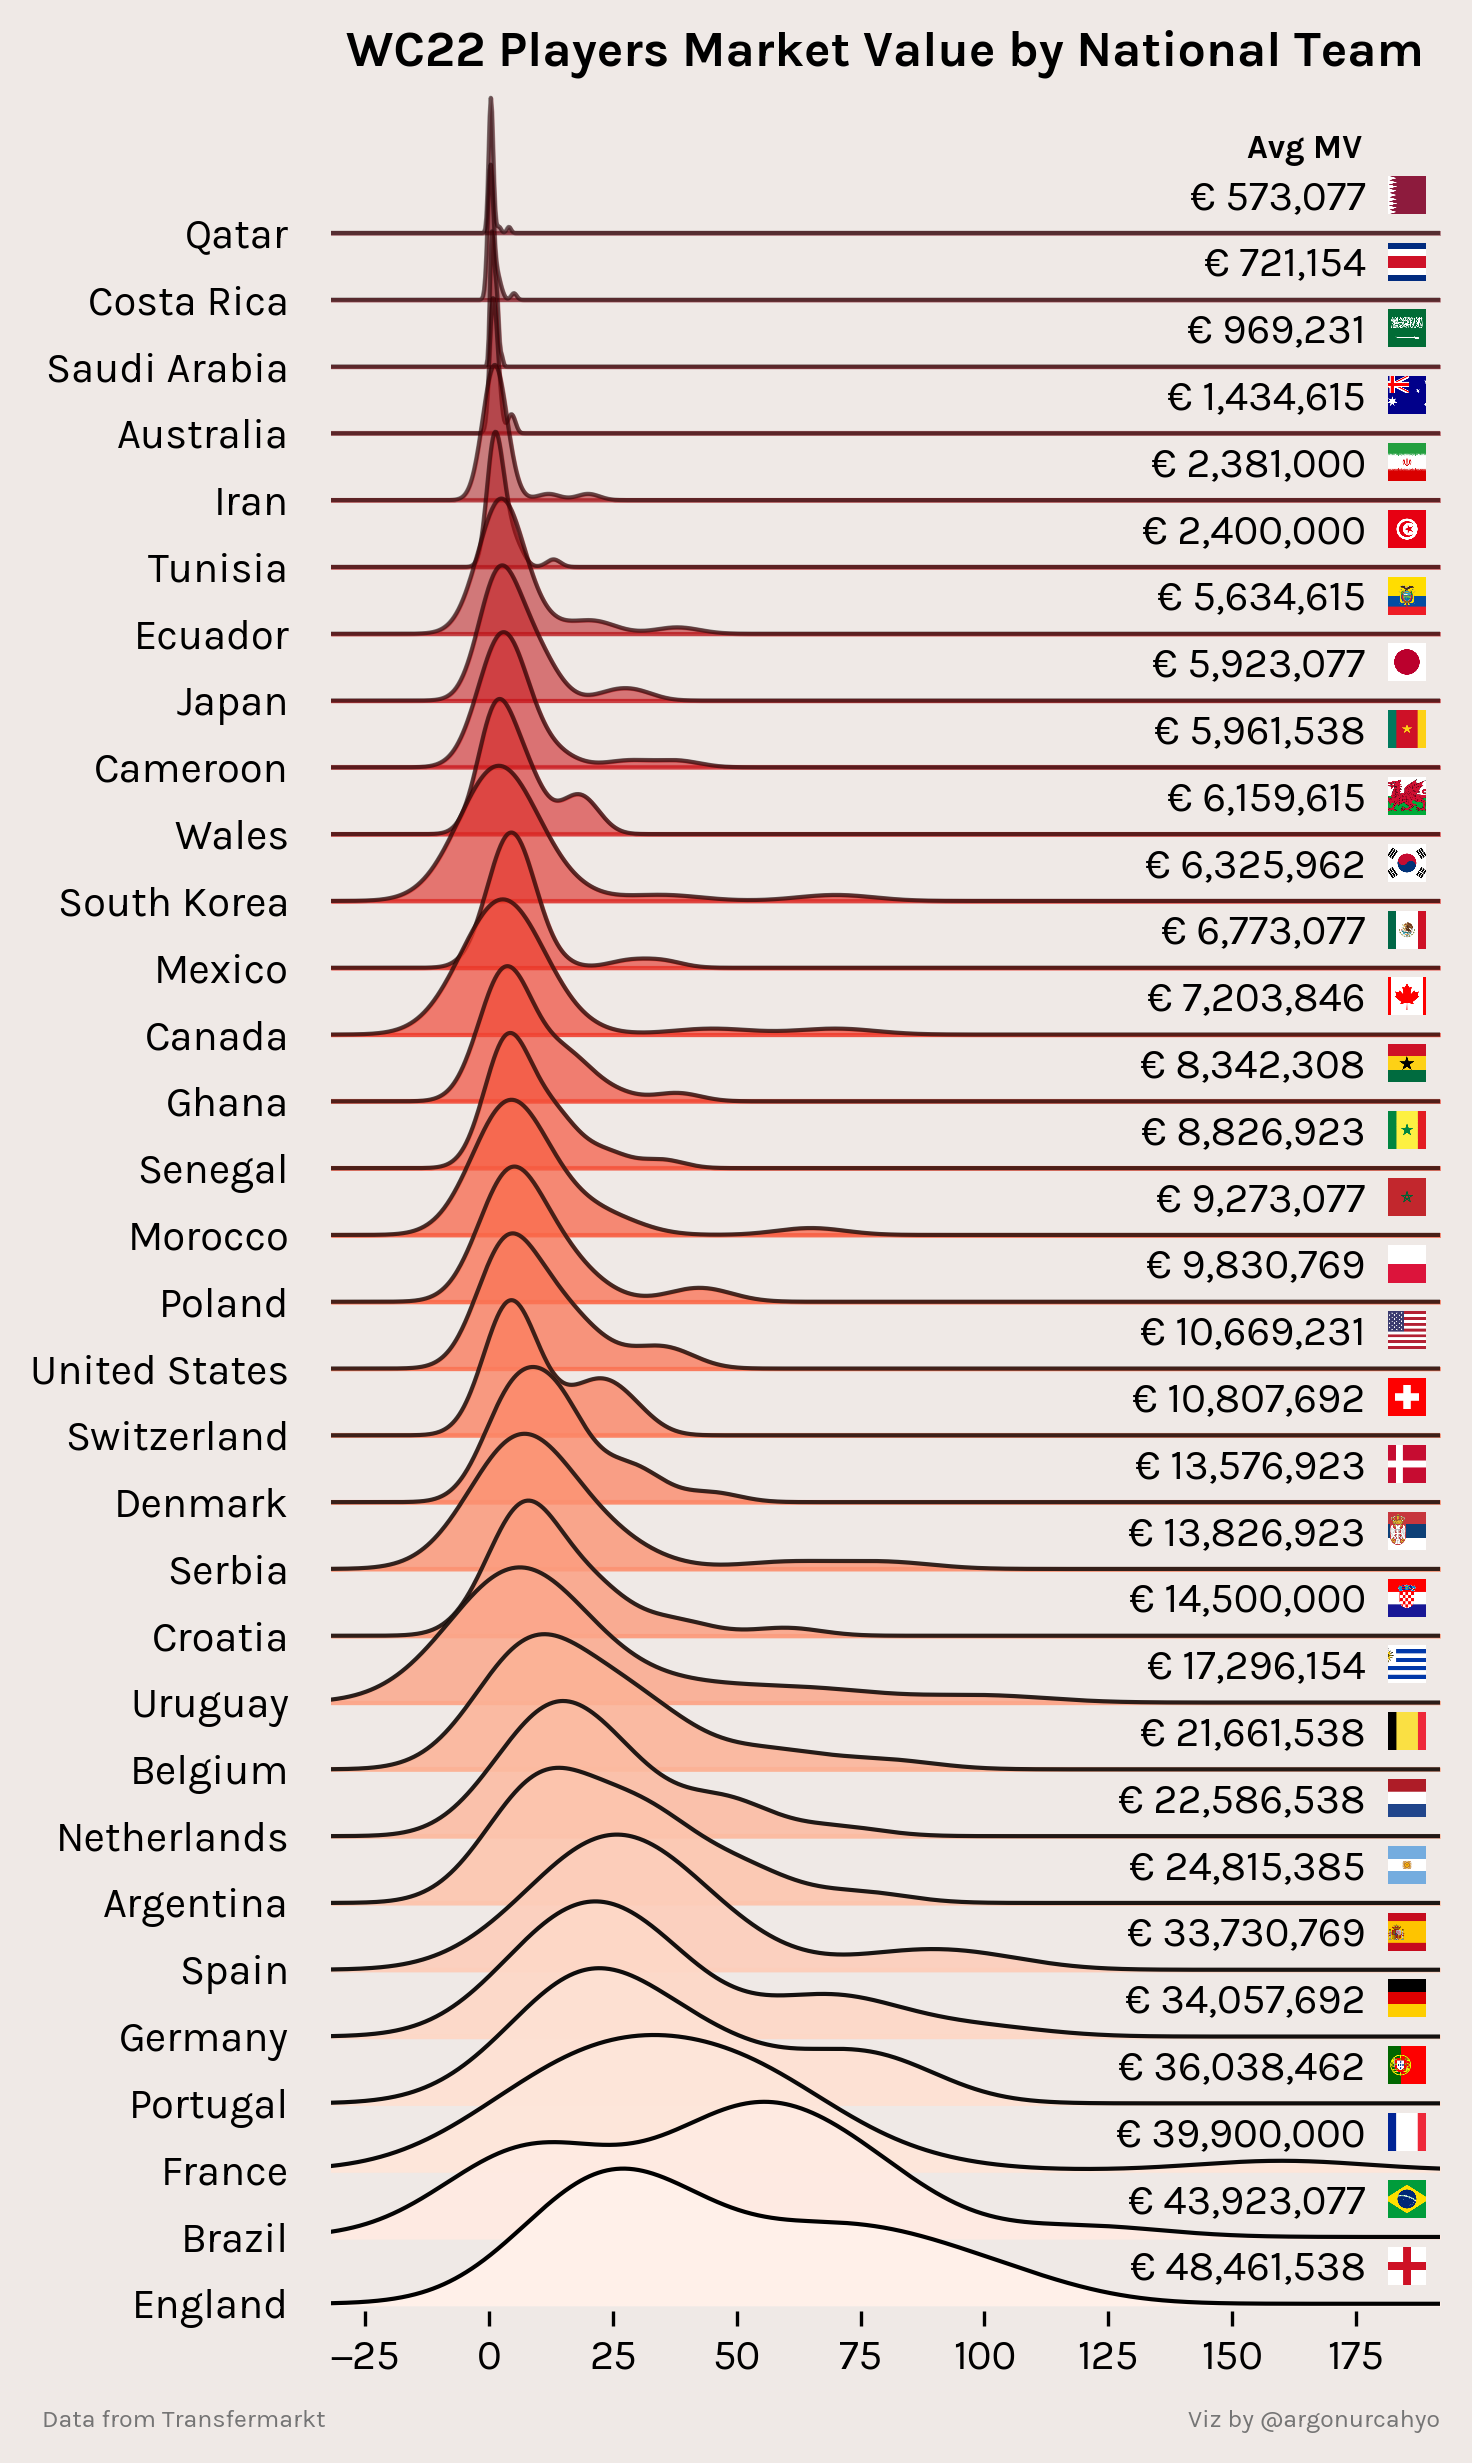

In [36]:
fig, axes = joypy.joyplot(df.groupby("country", sort=False),
                          # by="country",
                          column=['market_value'],
                          figsize=(5, 8),
                          linewidth=1,
                          overlap=.5,
                          colormap=[cm.Reds_r],
                          ylim="own",
                          fade=True,
                          background='#efe9e6'
                          #   grid='x',
                          #   bins=40,
                          # range_style='own'
                          # kind="kde",
                          #   x_range=[-11000000, 110000000]
                          )
fig.set_facecolor('#efe9e6')

for i in range(len(axes)-1):
    axes[i].annotate(f"€ {avg_mv['avg_mv'][i]:0,.0f}",
                     #  (avg_mv['avg_mv'][i]/1000000, axes[i].get_ylim()[1]),
                     (axes[i].get_xlim()[1]-15, .1*axes[i].get_ylim()[1]),
                     va="bottom", ha='right', font='Karla')
    flag_url = wc22_team[wc22_team['country'] ==
                         avg_mv['country'][i]]['flag_url'].iloc[0]
    flag = Image.open(urllib.request.urlopen(flag_url))
    im = OffsetImage(flag, zoom=.06)
    im.image.axes = axes[i]
    ab = AnnotationBbox(
        im, (.97, 0.3), xycoords='axes fraction', frameon=False)
    axes[i].add_artist(ab)
    # print(f"{i+1}. {avg_mv['country'][i]}")

axes[0].annotate('Avg MV',
                 xy=(.93, .6),
                 xycoords='axes fraction',
                 ha='right',
                 va='center',
                 fontweight='bold',
                 fontsize=8)
axes[-1].annotate('Data from Transfermarkt',
                  xy=(-.26, -.05),
                  xycoords='axes fraction',
                  ha='left', va='center', fontsize=6, color='#757575')
axes[-1].annotate('Viz by @argonurcahyo',
                  xy=(1, -.05),
                  xycoords='axes fraction',
                  ha='right', va='center', fontsize=6, color='#757575')
plt.rcParams["font.family"] = "Karla"
plt.rcParams["figure.dpi"] = "300"
plt.title("WC22 Players Market Value by National Team",
          fontsize=12, fontweight='bold')

plt.show()
